## Observations and Insights 

In [504]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [505]:
# First identify current pwd
import os
os.getcwd() 

'/Users/huiyingzheng/Desktop/Metplotlib-challenge'

In [506]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [507]:
# check if any duplicates in mouse_metadata
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [508]:
# I don't think there are any duplicates in mouse_metadata
mouse_metadata_rd = mouse_metadata.drop_duplicates()
mouse_metadata_rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ KB


In [509]:
# I don't think there are any duplicates in study_results, because this data is a time series with 5 data points for 
# each mouse at different time points, showing their tumor status changes, including met status...
study_results_rd = study_results.drop_duplicates()
study_results_rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1892 non-null   object 
 1   Timepoint           1892 non-null   int64  
 2   Tumor Volume (mm3)  1892 non-null   float64
 3   Metastatic Sites    1892 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 73.9+ KB


In [510]:
timepoint = study_results["Timepoint"].unique()
len(timepoint)

10

In [511]:
mouse_merge = mouse_metadata
mouse_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [512]:
# Combine the data into a single dataset
# I first divide the data into five datasets according to time points 
mouse_merge = mouse_metadata
for i in range(len(timepoint)):
    study_results_time = study_results.loc[study_results.Timepoint == timepoint[i]]
    study_results_time = study_results_time.rename(columns={"Timepoint":"Timepoint_"+str(i), 
                                                            "Tumor Volume (mm3)":"Tumor_volume (mm3)_"+str(i), 
                                                            "Metastatic Sites": "Metastatic_sites_"+str(i)})
    mouse_merge = pd.merge(mouse_merge, study_results_time, on="Mouse ID", how="left")
    
mouse_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_0,Tumor_volume (mm3)_0,Metastatic_sites_0,Timepoint_1,Tumor_volume (mm3)_1,...,Metastatic_sites_6,Timepoint_7,Tumor_volume (mm3)_7,Metastatic_sites_7,Timepoint_8,Tumor_volume (mm3)_8,Metastatic_sites_8,Timepoint_9,Tumor_volume (mm3)_9,Metastatic_sites_9
0,k403,Ramicane,Male,21,16,0,45.0,0,5.0,38.825898,...,1.0,35.0,26.546993,1.0,40.0,24.365505,1.0,45.0,22.050126,1.0
1,s185,Capomulin,Female,3,17,0,45.0,0,5.0,43.878496,...,1.0,35.0,28.328531,1.0,40.0,25.472143,1.0,45.0,23.343598,1.0
2,x401,Capomulin,Female,16,15,0,45.0,0,5.0,45.473753,...,0.0,35.0,30.206825,0.0,40.0,28.167397,0.0,45.0,28.484033,0.0
3,m601,Capomulin,Male,22,17,0,45.0,0,5.0,41.408591,...,1.0,35.0,30.834357,1.0,40.0,31.378045,1.0,45.0,28.430964,1.0
4,g791,Ramicane,Male,11,16,0,45.0,0,5.0,45.851531,...,1.0,35.0,30.960392,1.0,40.0,31.369406,1.0,45.0,29.128472,1.0


In [513]:
# Checking the number of mice in the DataFrame.
len(mouse_merge["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Answer: there are no duplicates, but I think the homework is asking to analyze the last time point observations,
# Answer: So I only need to analyze the Timepoint_9 in my dataset, with their tumor volume

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Answer: The duplicate mouse are those with other data points from different time points

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Answer: already did

In [514]:
# Checking the number of mice in the clean DataFrame.
len(mouse_merge["Mouse ID"].unique())

249

## Summary Statistics

In [515]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Answer: I can take several approaches, using groupby or loc, here I used loc
# First, I initiate several data series
name_sr = []
mean_sr = []
median_sr = []
var_sr = []
std_sr = []
sem_sr = []

# Second, extract number of drugs
drug = mouse_merge["Drug Regimen"].unique()
n = len(drug)

# for each drug, take the data out as temp data, and calculate all the statistics
for i in range(n):
    data_temp = mouse_merge.loc[mouse_merge["Drug Regimen"] == drug[i]]   
    name_sr.append(drug[i])
    mean_sr.append(round(data_temp["Tumor_volume (mm3)_9"].mean(),2))
    median_sr.append(round(data_temp["Tumor_volume (mm3)_9"].median(),2))
    var_sr.append(round(data_temp["Tumor_volume (mm3)_9"].var(),2))
    std_sr.append(round(data_temp["Tumor_volume (mm3)_9"].std(),2))
    sem_sr.append(round(data_temp["Tumor_volume (mm3)_9"].sem(),2))

# put all the data series into a dataframe
data = {'Drug Name':name_sr, 'Mean':mean_sr, 'Median':median_sr, 'Variance':var_sr, 'Std':std_sr, 'SEM':sem_sr} 
  
# Creates pandas DataFrame. 
Table1 = pd.DataFrame(data) 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Table1

,Drug Name,Mean,Median,Variance,Std,SEM
0,Ramicane,34.96,34.85,30.10,5.49,1.23
1,Capomulin,36.24,37.31,31.46,5.61,1.22
2,Infubinol,65.76,66.08,11.79,3.43,1.14
3,Placebo,68.08,69.04,20.10,4.48,1.35
4,Ceftamin,64.13,64.30,10.59,3.25,0.90
5,Stelasyn,68.44,69.30,27.34,5.23,1.58
6,Zoniferol,65.96,65.68,14.10,3.76,1.00
7,Ketapril,70.66,69.87,23.23,4.82,1.45
8,Propriva,66.26,64.96,24.97,5.00,1.89
9,Naftisol,69.27,69.56,26.08,5.11,1.42


## Bar Plots

In [516]:
mouse_merge2 = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
#mouse_merge2.shape
#mouse_merge2.head()
#happiness_df.sort_values("Freedom", ascending=False)

data_mouse_temp = mouse_merge2.loc[mouse_merge2["Timepoint"] == timepoint[9]]


#data_mouse_temp = sort_values.("Drug Regimen", ascending=False)
temp_count = data_mouse_temp["Drug Regimen"].value_counts(sort=False)
temp_name = data_mouse_temp["Drug Regimen"].unique()
#temp = temp.sort_values("Drug Regimen", ascending=True)
print(temp_count)
print(temp_name)

Placebo      11
Ketapril     11
Ceftamin     13
Naftisol     13
Propriva      7
Infubinol     9
Stelasyn     11
Capomulin    21
Ramicane     20
Zoniferol    14
Name: Drug Regimen, dtype: int64
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Zoniferol'
 'Stelasyn' 'Propriva' 'Naftisol' 'Ketapril']


In [517]:
mouse_merge2.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [518]:
mouse_merge2 = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
#mouse_merge2.groupby('Drug Regimen','Timepoint').value_counts()
mouse_merge2.head()
temp = mouse_merge2.groupby(["Timepoint","Drug Regimen"])
temp_df = pd.DataFrame(temp["Mouse ID"].count())
temp_df 

Mouse ID
Timepoint Drug Regimen          
0         Capomulin           25
          Ceftamin            25
          Infubinol           25
          Ketapril            25
          Naftisol            25
...                          ...
45        Placebo             11
          Propriva             7
          Ramicane            20
          Stelasyn            11
          Zoniferol           14

[100 rows x 1 columns]

In [524]:
temp_df_merge = temp_df.loc[timepoint[0]]
temp_df_merge = temp_df_merge.rename(columns={"Mouse ID":"Timepoint_"+str(timepoint[0])})

for i in range(1,len(timepoint)):
    temp_df_time = temp_df.loc[timepoint[i]]
    temp_df_time = temp_df_time.rename(columns={"Mouse ID":"Timepoint_"+str(timepoint[i])})
    temp_df_merge = pd.merge(temp_df_merge, temp_df_time, on="Drug Regimen", how="left")

temp_df_merge

,Timepoint_0,Timepoint_5,Timepoint_10,Timepoint_15,Timepoint_20,Timepoint_25,Timepoint_30,Timepoint_35,Timepoint_40,Timepoint_45
Drug Regimen,,,,,,,,,,
Capomulin,25,25,25,24,23,22,22,22,21,21
Ceftamin,25,21,20,19,18,18,16,14,14,13
Infubinol,25,25,21,21,20,18,17,12,10,9
Ketapril,25,23,22,19,19,19,18,17,15,11
Naftisol,25,23,21,21,20,18,15,15,15,13
Placebo,25,24,24,20,19,17,15,14,12,11
Propriva,26,25,23,17,17,14,13,10,9,7
Ramicane,25,25,24,24,23,23,23,21,20,20
Stelasyn,24,23,21,21,19,18,17,15,12,11


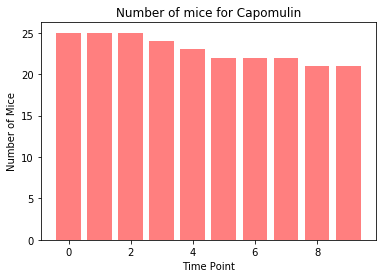

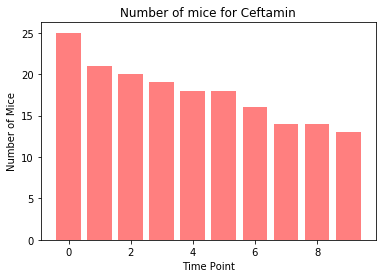

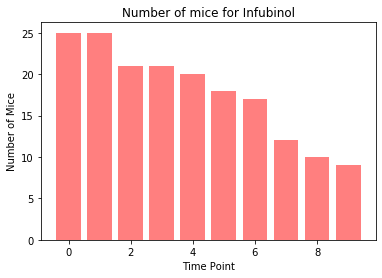

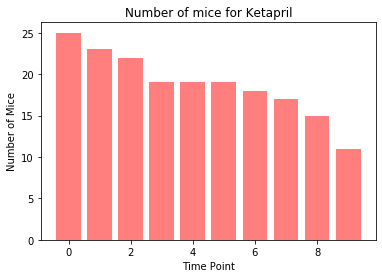

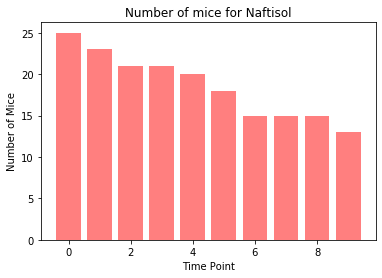

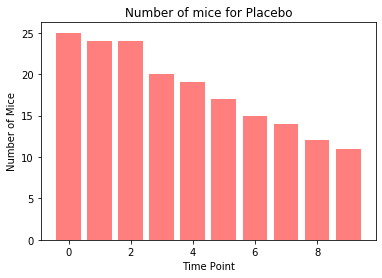

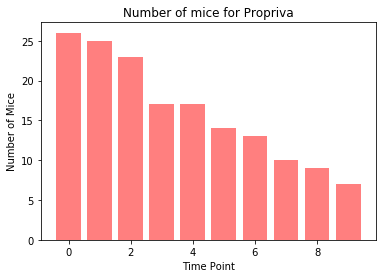

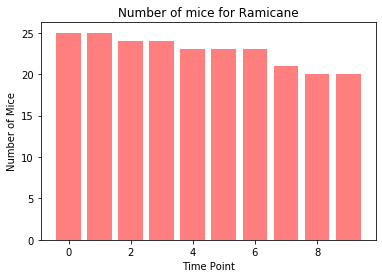

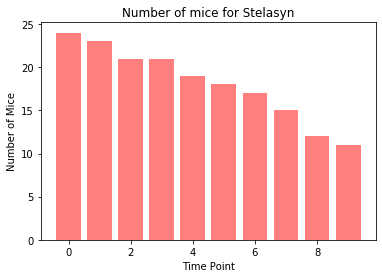

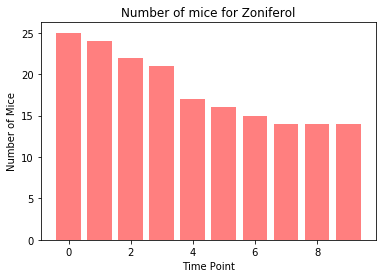

In [613]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
import numpy as np

# n is the time of loops
# I need to know the specific drug name
n = len(timepoint)
temp_df_names = temp_df_merge.index


for i in range(n):
    name_temp = temp_df_names[i]

    x_axis = np.arange(n)
    y_axis1 = temp_df_merge.iloc[i,:]
    y_axis1
    plt.bar(x_axis, y_axis1, color='r', alpha=0.5, align="center")
    plt.title("Number of mice for " + str(name_temp))
    plt.xlabel("Time Point")
    plt.ylabel("Number of Mice")
    plt.show()


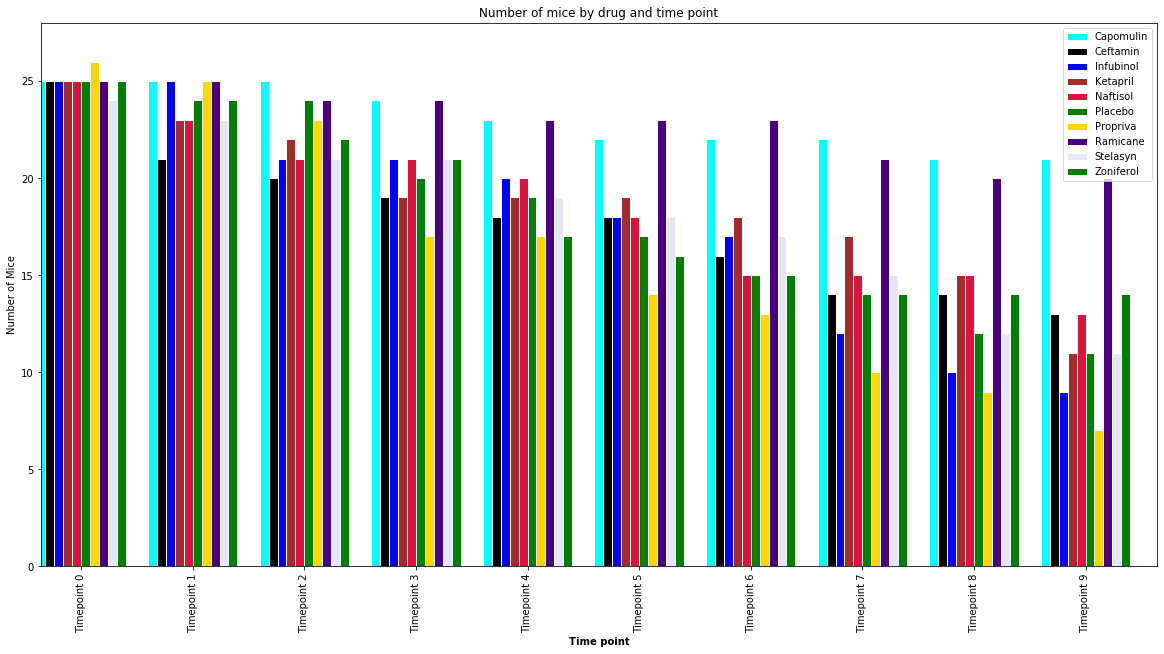

In [614]:
# I did something here to put everything in one bar graph, to compare between drugs and time point. 
# set width of bar
barWidth = 0.08

# Set position of bar on X axis
r1 = np.arange(n)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]

x_axis = np.arange(n)

bars0 = temp_df_merge.iloc[0,:]
bars1 = temp_df_merge.iloc[1,:]
bars2 = temp_df_merge.iloc[2,:]
bars3 = temp_df_merge.iloc[3,:]
bars4 = temp_df_merge.iloc[4,:]
bars5 = temp_df_merge.iloc[5,:]
bars6 = temp_df_merge.iloc[6,:]
bars7 = temp_df_merge.iloc[7,:]
bars8 = temp_df_merge.iloc[8,:]
bars9 = temp_df_merge.iloc[9,:]


plt.figure(figsize=(20,10))
plt.bar(r1, bars0, color="aqua",     width=barWidth, edgecolor='white', label=str(temp_df_merge.index[0]))
plt.bar(r2, bars1, color="black",    width=barWidth, edgecolor='white', label=str(temp_df_merge.index[1]))
plt.bar(r3, bars2, color="blue",     width=barWidth, edgecolor='white', label=str(temp_df_merge.index[2]))
plt.bar(r4, bars3, color="brown",    width=barWidth, edgecolor='white', label=str(temp_df_merge.index[3]))
plt.bar(r5, bars4, color="crimson",  width=barWidth, edgecolor='white', label=str(temp_df_merge.index[4]))
plt.bar(r6, bars5, color="green",    width=barWidth, edgecolor='white', label=str(temp_df_merge.index[5]))
plt.bar(r7, bars6, color="gold",     width=barWidth, edgecolor='white', label=str(temp_df_merge.index[6]))
plt.bar(r8, bars7, color="indigo",   width=barWidth, edgecolor='white', label=str(temp_df_merge.index[7]))
plt.bar(r9, bars8, color="lavender", width=barWidth, edgecolor='white', label=str(temp_df_merge.index[8]))
plt.bar(r10, bars9, color="green",   width=barWidth, edgecolor='white', label=str(temp_df_merge.index[9]))

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth*4.5 for r in range(n)], ['Timepoint 0','Timepoint 1', 'Timepoint 2', 'Timepoint 3', 'Timepoint 4', 'Timepoint 5',
                                                'Timepoint 6', 'Timepoint 7', 'Timepoint 8', 'Timepoint 9'],rotation=90)
 
# Create legend & Show graphic
plt.legend()

plt.title("Number of mice by drug and time point")
plt.xlabel("Time point")
plt.ylabel("Number of Mice")


plt.xlim(0, 10)
plt.ylim(0, 28)


plt.show()


([<matplotlib.patches.Wedge at 0x1a27d1d940>,
 [Text(-1.1337516867549884, -0.1926320658151672, 'Female mice'),
  Text(1.0844581524083035, 0.18425665707151234, 'Male mice')],
 [Text(-0.6408161707745585, -0.10887899372161625, '55.4%'),
  Text(0.5915226285863473, 0.10050363112991582, '44.6%')])

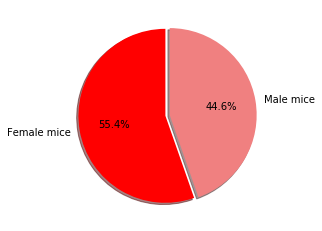

In [615]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot
size_female = mouse_merge[mouse_merge["Sex"]=="Female"].shape[0]
size_male = mouse_merge[mouse_merge["Sex"]=="Male"].shape[0]
sizes = [size_female, size_male]
explode = (0.05,0)
labels = ["Female mice", "Male mice"]
colors = ["red", "lightcoral"]

sizes
#mouse_merge["Mouse ID"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

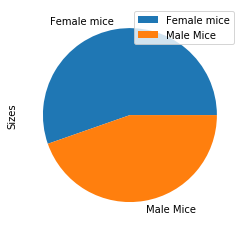

In [616]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_temp = pd.DataFrame({'Sizes': sizes},
                  index=['Female mice', 'Male Mice'])
pie_temp.plot.pie(y='Sizes', figsize=(4, 4))

## Quartiles, Outliers and Boxplots

In [617]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
temp_mouse_merge = mouse_merge[["Mouse ID", "Drug Regimen", "Tumor_volume (mm3)_9"]]
temp_mouse_merge_group = temp_mouse_merge.groupby("Drug Regimen")

temp_df_total = pd.DataFrame(temp_mouse_merge_group["Tumor_volume (mm3)_9"].mean())
temp_df_total = temp_df_total.rename(columns={"Tumor_volume (mm3)_9":"Total_volume"})
                                              
temp_df_25 = pd.DataFrame(temp_mouse_merge_group["Tumor_volume (mm3)_9"].quantile(.25))
temp_df_25 = temp_df_25.rename(columns={"Tumor_volume (mm3)_9":"25_Percentile"})

temp_df_75 = pd.DataFrame(temp_mouse_merge_group["Tumor_volume (mm3)_9"].quantile(.75))
temp_df_75 = temp_df_75.rename(columns={"Tumor_volume (mm3)_9":"75_Percentile"})

temp_df = pd.merge(temp_df_total, temp_df_25, on="Drug Regimen", how="left")
temp_df = pd.merge(temp_df, temp_df_75, on="Drug Regimen", how="left")

temp_df["IQR"] = temp_df_75["75_Percentile"] - temp_df_25["25_Percentile"]

temp_df = temp_df.sort_values("Total_volume", ascending=True)

temp_df_reduced = temp_df[0:4]
print(temp_df_reduced)

print("Remicane and Capomulin are similar to each other, and have lower mean tumor volumes than Ceftamin and Infubinol")

              Total_volume  25_Percentile  75_Percentile       IQR
Drug Regimen                                                      
Ramicane         34.955595      30.981175      38.508305  7.527130
Capomulin        36.236114      32.377357      40.159220  7.781863
Ceftamin         64.132421      61.433892      67.527482  6.093590
Infubinol        65.755562      62.754451      67.685569  4.931117
Remicane and Capomulin are similar to each other, and have lower mean tumor volumes than Ceftamin and Infubinol


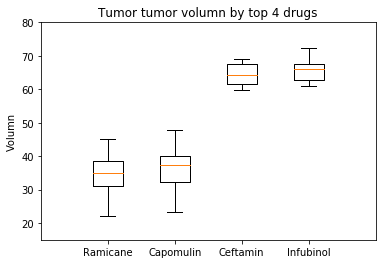

In [560]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
temp_mouse_merge1 = temp_mouse_merge.loc[temp_mouse_merge["Drug Regimen"] == "Ramicane"]
volumn1 = temp_mouse_merge1["Tumor_volume (mm3)_9"].dropna()

temp_mouse_merge2 = temp_mouse_merge.loc[temp_mouse_merge["Drug Regimen"] == "Capomulin"]
volumn2 = temp_mouse_merge2["Tumor_volume (mm3)_9"].dropna()

temp_mouse_merge3 = temp_mouse_merge.loc[temp_mouse_merge["Drug Regimen"] == "Ceftamin"]
volumn3 = temp_mouse_merge3["Tumor_volume (mm3)_9"].dropna()


temp_mouse_merge4 = temp_mouse_merge.loc[temp_mouse_merge["Drug Regimen"] == "Infubinol"]
volumn4 = temp_mouse_merge4["Tumor_volume (mm3)_9"].dropna()



data = [volumn1, volumn2, volumn3, volumn4]

fig4, ax4 = plt.subplots()
ax4.set_title('Tumor tumor volumn by top 4 drugs')
ax4.set_ylabel('Volumn')

ax4.boxplot(data)
plt.xticks([1, 2, 3 ,4], ['Ramicane', 'Capomulin', 'Ceftamin','Infubinol'])

ax4.set_xlim(0, 5)
ax4.set_ylim(15, 80)

plt.show()




## Line and Scatter Plots

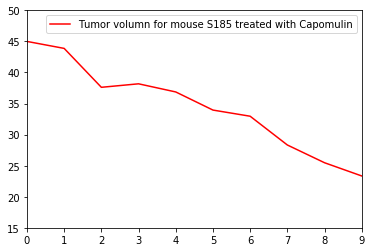

In [618]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_merge.head()

# I select the first mouse I saw that was treated with Capomulin
mouse_id = "s185"

temp_mouse = mouse_merge.loc[mouse_merge["Mouse ID"] == mouse_id]
temp_mouse = temp_mouse[["Tumor_volume (mm3)_0","Tumor_volume (mm3)_1","Tumor_volume (mm3)_2","Tumor_volume (mm3)_3","Tumor_volume (mm3)_4","Tumor_volume (mm3)_5"
                        ,"Tumor_volume (mm3)_6","Tumor_volume (mm3)_7","Tumor_volume (mm3)_8","Tumor_volume (mm3)_9"]]

temp_mouse = temp_mouse.transpose()
x_axis = np.arange(len(timepoint))

cap_mouse, = plt.plot(x_axis, temp_mouse, color="red", label="Tumor volumn for mouse S185 treated with Capomulin")
plt.legend()

#plt.xticks(range(len(timepoint)), ['Ramicane', 'Capomulin', 'Ceftamin','Infubinol'])

plt.xlim(0, 9)
plt.ylim(15, 50)


plt.xticks(np.arange(0,10,1)) 

# Show the chart
plt.show()

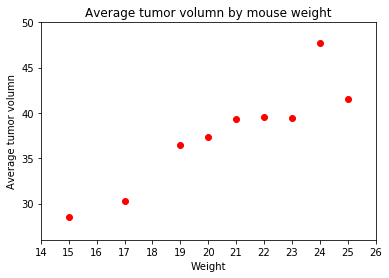

In [581]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_merge.head()
temp_mouse = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Capomulin"]
temp_volumn = temp_mouse.dropna()


#temp_volumn_rd = temp_volumn[["Mouse ID", "Weight(g)", "Tumor_volume (mm3)_9"]]
#temp_mouse_merge_group = temp_mouse_merge.groupby("Drug Regimen")

temp_volumn_group = temp_volumn.groupby(["Weight (g)"])
temp_volumn_group
temp_volumn_y = pd.DataFrame(temp_volumn_group["Tumor_volume (mm3)_9"].mean())
temp_volumn_y = temp_volumn_y.rename(columns={"Tumor_volume (mm3)_9":"Averge_volume_by_weight"})


temp_volumn_y.shape
temp_volumn_x = pd.DataFrame(temp_volumn_group["Weight (g)"].unique())
temp_volumn_x.shape


plt.scatter(temp_volumn_x, temp_volumn_y, marker="o", facecolors="red", alpha=1)
plt.title("Average tumor volumn by mouse weight")
plt.xlabel("Weight")
plt.ylabel("Average tumor volumn")
plt.xticks(np.arange(14,27,1)) 

plt.xlim(14, 26)
plt.ylim(26, 50)

plt.show()

## Correlation and Regression

The correlation coefficient is 0.92
The r-squared is: 0.92, which shows a strong evidence of linear relationship.


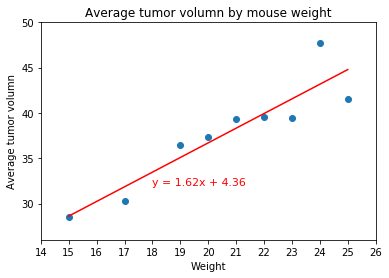

In [619]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#temp_volumn_y["Averge_volume_by_weight"]
#temp_volumn_x["Weight (g)"].astype(float)

temp_volumn_x["Weight (g)"] = temp_volumn_x["Weight (g)"].astype(float)
coef = round(st.pearsonr(temp_volumn_x["Weight (g)"],temp_volumn_y["Averge_volume_by_weight"])[0],2)
print(f"The correlation coefficient is {coef}")

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_volumn_x["Weight (g)"], temp_volumn_y["Averge_volume_by_weight"])
y_fitted = temp_volumn_x["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(temp_volumn_x["Weight (g)"], temp_volumn_y["Averge_volume_by_weight"])
plt.plot(temp_volumn_x["Weight (g)"],y_fitted,"r-")

plt.annotate(line_eq,(18,32),fontsize=11,color="red")
plt.title("Average tumor volumn by mouse weight")
plt.xlabel("Weight")
plt.ylabel("Average tumor volumn")
print(f"The r-squared is: {round(rvalue,2)}, which shows a strong evidence of linear relationship.")
plt.xticks(np.arange(14,27,1)) 

plt.xlim(14, 26)
plt.ylim(26, 50)
plt.show()